# **0. LOADING DATASET**

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/MachineLearning/praktikum11/"

In [24]:
import pandas as pd

path = '/content/gdrive/MyDrive/MachineLearning/praktikum11'
df = pd.read_csv(path + '/data/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **1. Cek Info Dataset, Missing Value, Duplikat, Statistik**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
df["Species"].unique()        # jenis-jenis spesies
df["Species"].value_counts()  # jumlah masing-masing spesies

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# **3. Label Encoding & Pemilihan Fitur**

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encoding label Species
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

# Fitur untuk clustering (tanpa label)
X = df.drop(["Id", "Species"], axis=1)

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesEncoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


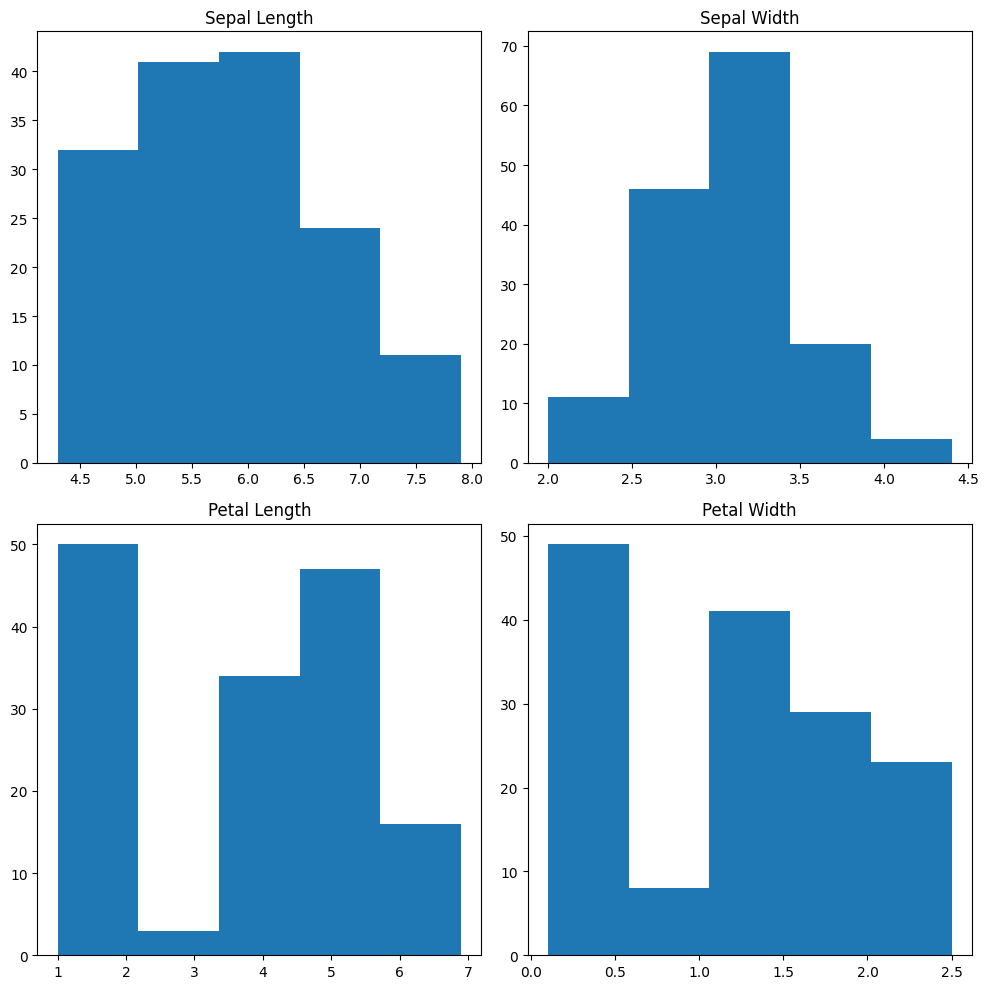

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X["SepalLengthCm"], bins=5)

axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X["SepalWidthCm"], bins=5)

axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X["PetalLengthCm"], bins=5)

axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(X["PetalWidthCm"], bins=5)

plt.tight_layout()
plt.show()

# **4. APA KEK**

In [32]:
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur
scaler = StandardScaler()

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# **5. Menentukan Jumlah Cluster (K) dengan Elbow Method**

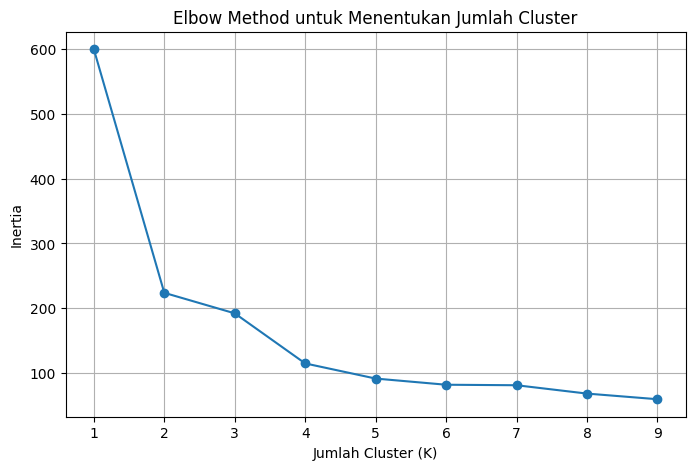

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)  # coba K dari 1 sampai 9

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# **5. Membangun Model K-Means**

In [34]:
from sklearn.cluster import KMeans

# Inisialisasi model K-Means
kmeans = KMeans(
    n_clusters=3,      # hasil dari Elbow Method
    init="k-means++",  # strategi pilih centroid awal
    random_state=42
)

# Melatih dan membuat prediksi cluster
df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


In [35]:
# Latih Model
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [36]:
# Prediksi cluster untuk data x
labels = kmeans.predict(X)

In [37]:
# Masukan data frame
df["Cluster"] = kmeans.fit_predict(X)

In [38]:
print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


# **6. Evaluasi Kualitas Clustering (Silhouette Score)**

In [39]:
from sklearn.metrics import silhouette_score

sil = silhouette_score(X, df["Cluster"])
print("Silhouette Score :", sil)

Silhouette Score : 0.4787241921049546


# **7. Confusion Matrix vs Label Asli**

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print("CONFUSION MATRIX")
print(cm)

CONFUSION MATRIX
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


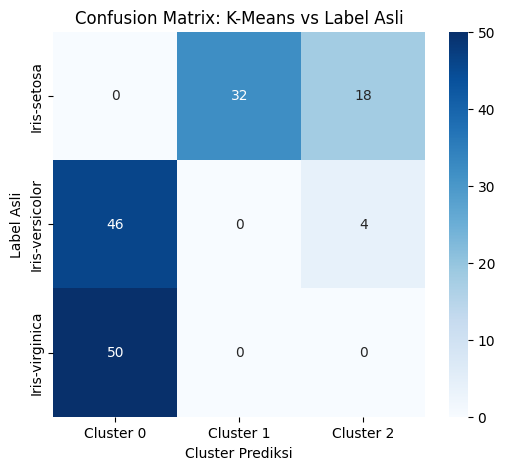

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap (
    cm, annot=True,fmt='d', cmap="Blues",
    xticklabels=["Cluster 0","Cluster 1","Cluster 2"],
    yticklabels=le.classes_
)
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

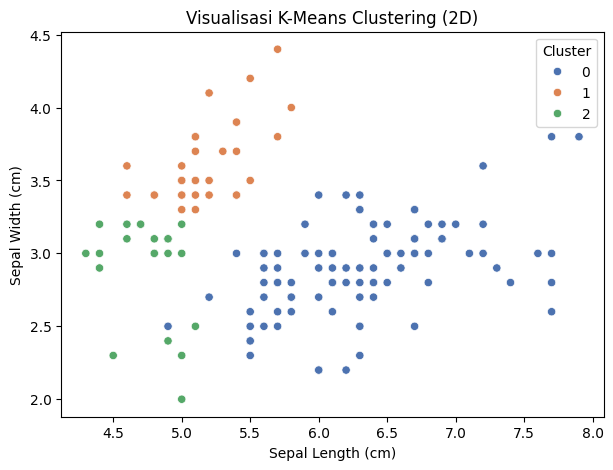

In [42]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

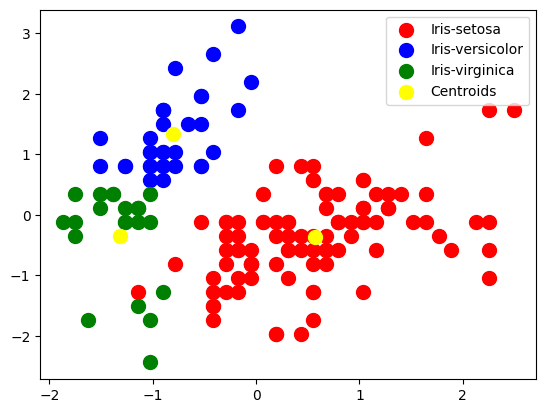

In [43]:
# Visualising the clusters
plt.scatter(X[df["Cluster"] == 0, 0], X[df["Cluster"] == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[df["Cluster"] == 1, 0], X[df["Cluster"] == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[df["Cluster"] == 2, 0], X[df["Cluster"] == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()